# 1 - Problema e ferramenta

## 1.3 Dicionário dos dados

https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features

* `Acousticness/Acústica:` Variável numérica, medida de confiança de 0,0 a 1,0 se a faixa é acústica. 1.0 representa alta confiança de que a faixa é acústica.

* `Danceability/Dançabilidade:` Variável numérica, a dançabilidade descreve o quão adequada uma faixa é para dançar com base em uma combinação de elementos musicais, incluindo tempo, estabilidade do ritmo, força da batida e regularidade geral. Um valor de 0,0 é o menos dançável e 1,0 é o mais dançável.

* `Duration_ms:`Variável numérica, a duração da trilha em milissegundos.

* `Duration_min:` Variável numérica, a duração da faixa em minutos.

* `Energy/Energia:` Variável numérica, Energia é uma medida de 0,0 a 1,0 e representa uma medida perceptiva de intensidade e atividade. Normalmente, as faixas energéticas parecem rápidas, altas e barulhentas. Por exemplo, o death metal tem alta energia, enquanto um prelúdio de Bach tem uma pontuação baixa na escala. As características perceptivas que contribuem para este atributo incluem faixa dinâmica, intensidade percebida, timbre, taxa de início e entropia geral.

* `Explicit/Explícito:` Variável categórica, se a faixa tem ou não letras explícitas (verdadeiro = sim (1); falso = não(0), não OU desconhecido).

* `Id:` O ID do Spotify para a faixa.

* `Instrumentalness/Instrumentalidade:` Variável numérica, prevê se uma faixa não contém vocais. Os sons “Ooh” e “aah” são tratados como instrumentais neste contexto. Faixas de rap ou de palavras faladas são claramente “vocais”. Quanto mais próximo o valor de instrumentalidade estiver de 1,0, maior a probabilidade de a faixa não conter conteúdo vocal. Valores acima de 0,5 destinam-se a representar faixas instrumentais, mas a confiança é maior à medida que o valor se aproxima de 1,0.

* `Key/Chave:`Variável numérica, a chave geral estimada da faixa. Os inteiros são mapeados para pitchs usando a notação padrão de Pitch Class. Por exemplo. 0 = C, 1 = C#/Db, 2 = D, e assim por diante. Se nenhuma chave foi detectada, o valor é -1.

* `Liveness/ Ao vivo:` Variável numérica, detecta a presença de um público na gravação. Valores mais altos de vivacidade representam uma probabilidade maior de que a faixa tenha sido executada ao vivo. Um valor acima de 0,8 fornece uma forte probabilidade de que a faixa esteja ativa.

* `Loudness/ Volume em dB:` Variável numérica, volume geral de uma faixa em decibéis (dB). Os valores de volume são calculados em média em toda a faixa e são úteis para comparar o volume relativo das faixas. A sonoridade é a qualidade de um som que é o principal correlato psicológico da força física (amplitude). Os valores típicos variam entre -60 e 0 db.

* `Mode/ Modo:` Variável numérica, o modo indica a modalidade (maior ou menor) de uma faixa, o tipo de escala da qual seu conteúdo melódico é derivado. Maior é representado por 1 e menor é 0.

* `Popularity/Popularidade:` Variável numérica, a popularidade de uma faixa é um valor entre 0 e 100, sendo 100 o mais popular. A popularidade é calculada por algoritmo e é baseada, em grande parte, no número total de execuções que a faixa teve e quão recentes são essas execuções.

* `Speechiness/Fala:` Variável numérica, a fala detecta a presença de palavras faladas em uma faixa. Quanto mais exclusivamente falada a gravação (por exemplo, talk show, audiolivro, poesia), mais próximo de 1,0 o valor do atributo. Valores acima de 0,66 descrevem faixas que provavelmente são feitas inteiramente de palavras faladas. Valores entre 0,33 e 0,66 descrevem faixas que podem conter música e fala, seja em seções ou em camadas, incluindo casos como música rap. Os valores abaixo de 0,33 provavelmente representam músicas e outras faixas que não são de fala.

* `Tempo:` Variável numérica, Tempo estimado geral de uma faixa em batidas por minuto (BPM). Na terminologia musical, tempo é a velocidade ou ritmo de uma determinada peça e deriva diretamente da duração média da batida.

* `Valence/Valência:` Variável numérica, Medida de 0,0 a 1,0 descrevendo a positividade musical transmitida por uma faixa. Faixas com alta valência soam mais positivas (por exemplo, feliz, alegre, eufórica), enquanto faixas com baixa valência soam mais negativas (por exemplo, triste, deprimida, irritada).

* `Year/Ano:` Ano em que a música foi lançada.

In [2]:
from pyspark.sql import SparkSession

# importar os arquivos utilizando uma url
from pyspark import SparkFiles
import pyspark.sql.functions as f

import plotly.express as px

In [3]:
sessao_spark = SparkSession.builder\
                           .appName("Recomendador PySpark")\
                           .getOrCreate()
sessao_spark

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/03/27 05:27:39 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


# 2 - Leitura e análise dos dados

In [4]:
url_dados = 'https://github.com/IgorNascAlves/dados/blob/main/dados_musicas.csv?raw=true'
sessao_spark.sparkContext.addFile(url_dados)
path_dados_file = 'file://' + SparkFiles.get('dados_musicas.csv')

In [5]:
dados = sessao_spark.read.csv(path_dados_file, header=True, sep=';', inferSchema=True)

In [6]:
dados.show()

+------------------+----+------------+--------------+------------------+-----------+------------------+--------+--------------------+--------------------+---+--------+-------------------+----+--------------------+----------+-----------+------------------+--------------------+
|           valence|year|acousticness|       artists|      danceability|duration_ms|            energy|explicit|                  id|    instrumentalness|key|liveness|           loudness|mode|                name|popularity|speechiness|             tempo|        artists_song|
+------------------+----+------------+--------------+------------------+-----------+------------------+--------+--------------------+--------------------+---+--------+-------------------+----+--------------------+----------+-----------+------------------+--------------------+
|             0.285|2000|     0.00239|      Coldplay|             0.429|     266773|0.6609999999999999|       0|3AJwUDP919kvQ9Qco...|             1.21E-4| 11|   0.234|  

In [7]:
dados.printSchema()

root
 |-- valence: double (nullable = true)
 |-- year: integer (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- artists: string (nullable = true)
 |-- danceability: double (nullable = true)
 |-- duration_ms: integer (nullable = true)
 |-- energy: double (nullable = true)
 |-- explicit: integer (nullable = true)
 |-- id: string (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- key: integer (nullable = true)
 |-- liveness: double (nullable = true)
 |-- loudness: double (nullable = true)
 |-- mode: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- popularity: integer (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- artists_song: string (nullable = true)



In [8]:
dados.count()

20311

In [9]:
len(dados.columns)

19

In [10]:
# buscando por valores nulos
dados.select([f.count(f.when(f.isnull(c), 1)).alias(c) for c in dados.columns]).show()

+-------+----+------------+-------+------------+-----------+------+--------+---+----------------+---+--------+--------+----+----+----------+-----------+-----+------------+
|valence|year|acousticness|artists|danceability|duration_ms|energy|explicit| id|instrumentalness|key|liveness|loudness|mode|name|popularity|speechiness|tempo|artists_song|
+-------+----+------------+-------+------------+-----------+------+--------+---+----------------+---+--------+--------+----+----+----------+-----------+-----+------------+
|      0|   0|           0|      0|           0|          0|     0|       0|  0|               0|  0|       0|       0|   0|   0|         0|          0|    0|           0|
+-------+----+------------+-------+------------+-----------+------+--------+---+----------------+---+--------+--------+----+----+----------+-----------+-----+------------+



In [11]:
sorted(dados.select('year').distinct().collect())

[Row(year=2000),
 Row(year=2001),
 Row(year=2002),
 Row(year=2003),
 Row(year=2004),
 Row(year=2005),
 Row(year=2006),
 Row(year=2007),
 Row(year=2008),
 Row(year=2009),
 Row(year=2010),
 Row(year=2011),
 Row(year=2012),
 Row(year=2013),
 Row(year=2014),
 Row(year=2015),
 Row(year=2016),
 Row(year=2017),
 Row(year=2018),
 Row(year=2019),
 Row(year=2020)]

## 2. - Análise dos dados dos anos

In [12]:
url_anos_dados = 'https://github.com/IgorNascAlves/dados/blob/main/dados_musicas_ano.csv?raw=true'

sessao_spark.sparkContext.addFile(url_anos_dados)
path_dados_file = 'file://' + SparkFiles.get('dados_musicas_ano.csv')

dados_anos = sessao_spark.read.csv(path_dados_file, header=True, inferSchema=True)

In [13]:
dados_anos.show()

+----+----+------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+---+
|mode|year|      acousticness|       danceability|       duration_ms|             energy|   instrumentalness|           liveness|           loudness|        speechiness|             tempo|            valence|         popularity|key|
+----+----+------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+---+
|   1|1921|0.8868960000000005| 0.4185973333333336|260537.16666666663|0.23181513333333334|0.34487805886666656|            0.20571| -17.04866666666665|           0.073662|101.53149333333329|0.37932666666666665| 0.6533333333333333|  2|
|   1|1922|0.9385915492957748| 0.4820422535211267|165469.74647887325

In [14]:
dados_anos = dados_anos.filter('year >= 2000')
dados_anos.show()

+----+----+-------------------+------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+---+
|mode|year|       acousticness|      danceability|       duration_ms|            energy|   instrumentalness|           liveness|           loudness|        speechiness|             tempo|           valence|        popularity|key|
+----+----+-------------------+------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+---+
|   1|2000|0.28932270051635994| 0.590918047034764| 242724.6426380368|0.6254128323108387|0.10116776879345596| 0.1976860429447853| -8.247765848670758|0.08920541922290394| 118.9993231083843|0.5594754601226991|  46.6840490797546|  7|
|   1|2001| 0.2868424748428934|0.5833178553615969|240307.79600997505|0.626985522

In [15]:
dados_anos.count()

21

In [16]:
len(dados_anos.columns)

14

[Documentação do ToPandas](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.DataFrame.toPandas.html)

ToPandas vai pegar todos os dados e trazer para um nó 

In [17]:
# transforma os dados no formado do pandas
fig = px.line(dados_anos.toPandas(), x='year', y='loudness', markers=True, title='Variação do loudness conforme os anos')
fig.show()

In [18]:
import plotly.graph_objects as go

fig = go.Figure()

temp = dados_anos.toPandas()

fig.add_trace(go.Scatter(x=temp['year'], y=temp['acousticness'], name='Acousticness'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['valence'],
                    name='Valence'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['danceability'],
                    name='Danceability'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['energy'],
                    name='Energy'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['instrumentalness'],
                    name='Instrumentalness'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['liveness'],
                    name='Liveness'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['speechiness'],
                    name='Speechiness'))

fig.show()

## 2.3 Matriz de correlação

In [19]:
fig = px.imshow(dados_anos.drop('mode').toPandas().corr(), text_auto=True)
fig.update_layout(images=[dict(
        xref="x",
        yref="y",
        sizex=20,  # Ajuste os valores conforme necessário
        sizey=20,  # Ajuste os valores conforme necessário
        x=0,
        y=0,
        opacity=0.5,
        layer="below",
        sizing="stretch",
        source='https://images.plot.ly/language-icons/api-home/python-logo.png')]
)

fig.update_traces(textfont_size=10)
fig.update_layout(
    width=1200,  # Largura da figura em pixels
    height=800  # Altura da figura em pixels
)
fig.show()

#  3 - Clusterização por gênero

##  3.1 PCA e StandartScaler

In [20]:
url_dados_generos = 'https://github.com/IgorNascAlves/dados/blob/main/dados_musicas_genero.csv?raw=true'

sessao_spark.sparkContext.addFile(url_dados_generos)
path_dados_file = "file://" + SparkFiles.get("dados_musicas_genero.csv")

dados_generos = sessao_spark.read.csv(path_dados_file, header=True, inferSchema= True)

In [21]:
dados_generos.show()

+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+---+
|mode|              genres|       acousticness|       danceability|       duration_ms|             energy|    instrumentalness|           liveness|           loudness|         speechiness|             tempo|            valence|        popularity|key|
+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+---+
|   1|21st century clas...| 0.9793333333333332|0.16288333333333335|160297.66666666663|0.07131666666666665|          0.60683367|             0.3616|-31.514333333333337| 0.04056666666666667|           75.3365|0.10378333333333334| 27.83333333333333| 

In [22]:
dados_generos.count()

2973

In [23]:
dados_generos.select('genres').distinct().count()

2973

In [24]:
len(dados_generos.columns)

14

Esse passo é para deixar os dados na mesma escala para aplicar o PCA

In [25]:
from pyspark.ml.feature import VectorAssembler

In [26]:
dados_generos.columns

['mode',
 'genres',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence',
 'popularity',
 'key']

In [27]:
X = dados_generos.columns
X.remove('genres')
X

['mode',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence',
 'popularity',
 'key']

In [28]:
dados_generos_vector = VectorAssembler(inputCols=X, outputCol='features').transform(dados_generos).select(['features', 'genres'])

In [29]:
dados_generos_vector.show(truncate=False, n=5)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------+
|features                                                                                                                                                                                                                   |genres                |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------+
|[1.0,0.9793333333333332,0.16288333333333335,160297.66666666663,0.07131666666666665,0.60683367,0.3616,-31.514333333333337,0.04056666666666667,75.3365,0.10378333333333334,27.83333333333333,6.0]                            |21st century classical|
|[1.0,0.49478,0.2993

24/03/27 05:27:52 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [30]:
from pyspark.ml.feature import StandardScaler

In [31]:
scaler = StandardScaler(inputCol='features', outputCol='scaled_features')
scaler_model = scaler.fit(dados_generos_vector)
dados_generos_scaler = scaler_model.transform(dados_generos_vector)

In [32]:
dados_generos_scaler.show()

+--------------------+--------------------+--------------------+
|            features|              genres|     scaled_features|
+--------------------+--------------------+--------------------+
|[1.0,0.9793333333...|21st century clas...|[2.68174831000279...|
|[1.0,0.49478,0.29...|               432hz|[2.68174831000279...|
|[1.0,0.762,0.7120...|               8-bit|[2.68174831000279...|
|[1.0,0.6514170195...|                  []|[2.68174831000279...|
|[1.0,0.6765573049...|          a cappella|[2.68174831000279...|
|[1.0,0.45921,0.51...|            abstract|[2.68174831000279...|
|[1.0,0.3421466666...|      abstract beats|[2.68174831000279...|
|[1.0,0.2438540633...|    abstract hip hop|[2.68174831000279...|
|[0.0,0.3229999999...|           accordeon|[0.0,1.0101313736...|
|[1.0,0.446125,0.6...|           accordion|[2.68174831000279...|
|[0.0,0.0679505384...|          acid house|[0.0,0.2125045534...|
|[1.0,0.2569145079...|           acid rock|[2.68174831000279...|
|[1.0,0.00683,0.66...|   

##  3.2 PCA

In [33]:
from pyspark.ml.feature import PCA

In [34]:
pca = PCA(k=2, inputCol='scaled_features', outputCol='pca_features')
model_pca = pca.fit(dados_generos_scaler)
dados_generos_pca = model_pca.transform(dados_generos_scaler)

In [35]:
dados_generos_pca.select('pca_features').show(truncate=False)

+-----------------------------------------+
|pca_features                             |
+-----------------------------------------+
|[-2.507095366888566,-0.43816913737698426]|
|[0.5969679056633481,-4.9816120527513545] |
|[4.158460276223561,0.8366525081079923]   |
|[2.3873448785122164,0.4877989015663364]  |
|[2.6501218371679087,0.5756819768820428]  |
|[1.4965091203367626,-1.8644183183717817] |
|[3.9235207721573238,-0.2851835002352867] |
|[4.6110111098311135,0.6783790472312343]  |
|[2.8376900630842297,0.5712993716580531]  |
|[2.7066901398927827,1.2593788079708268]  |
|[4.698331383924287,-1.2765569680619442]  |
|[3.3759874966798673,-0.7560741064307506] |
|[5.608998877066021,-1.042731164439324]   |
|[-0.2954946352117681,0.27638645862362693]|
|[2.5725591062870423,1.3169815431109755]  |
|[3.400822802049345,-0.5073029625781933]  |
|[4.366720316263418,0.3364827059771049]   |
|[2.7254698167724003,-0.5058604987046399] |
|[4.958112358381604,-1.2627579957290722]  |
|[3.6934951846422712,-1.38227620

In [36]:
from pyspark.ml import Pipeline

In [37]:
pca_pipeline = Pipeline(stages=[VectorAssembler(inputCols=X, outputCol='features'),
                                StandardScaler(inputCol='features', outputCol='scaled_features'),
                                PCA(k=2, inputCol='scaled_features', outputCol='pca_features')])

In [38]:
pca_pipeline_model = pca_pipeline.fit(dados_generos)

In [39]:
dados_generos_pca = pca_pipeline_model.transform(dados_generos)

In [40]:
dados_generos_pca.show()

+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+---+--------------------+--------------------+--------------------+
|mode|              genres|       acousticness|       danceability|       duration_ms|             energy|    instrumentalness|           liveness|           loudness|         speechiness|             tempo|            valence|        popularity|key|            features|     scaled_features|        pca_features|
+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+---+--------------------+--------------------+--------------------+
|   1|21st century clas...| 0.9793333333333332|0.162883333

In [41]:
dados_generos_pca.select('pca_features').show(truncate=False)

+-----------------------------------------+
|pca_features                             |
+-----------------------------------------+
|[-2.507095366888566,-0.43816913737698426]|
|[0.5969679056633481,-4.9816120527513545] |
|[4.158460276223561,0.8366525081079923]   |
|[2.3873448785122164,0.4877989015663364]  |
|[2.6501218371679087,0.5756819768820428]  |
|[1.4965091203367626,-1.8644183183717817] |
|[3.9235207721573238,-0.2851835002352867] |
|[4.6110111098311135,0.6783790472312343]  |
|[2.8376900630842297,0.5712993716580531]  |
|[2.7066901398927827,1.2593788079708268]  |
|[4.698331383924287,-1.2765569680619442]  |
|[3.3759874966798673,-0.7560741064307506] |
|[5.608998877066021,-1.042731164439324]   |
|[-0.2954946352117681,0.27638645862362693]|
|[2.5725591062870423,1.3169815431109755]  |
|[3.400822802049345,-0.5073029625781933]  |
|[4.366720316263418,0.3364827059771049]   |
|[2.7254698167724003,-0.5058604987046399] |
|[4.958112358381604,-1.2627579957290722]  |
|[3.6934951846422712,-1.38227620

##  3.3 K-Means

https://user.ceng.metu.edu.tr/~akifakkus/courses/ceng574/k-means/

In [42]:
from pyspark.ml.clustering import KMeans

In [43]:
SEED = 1224

In [44]:
kmeans = KMeans(featuresCol='pca_features', predictionCol='cluster_pca').setK(5).setSeed(SEED)

In [45]:
model_kmeans = kmeans.fit(dados_generos_pca)

In [46]:
prections_kmeans = model_kmeans.transform(dados_generos_pca)

In [47]:
prections_kmeans.select('pca_features', 'cluster_pca').show(truncate=False)

+-----------------------------------------+-----------+
|pca_features                             |cluster_pca|
+-----------------------------------------+-----------+
|[-2.507095366888566,-0.43816913737698426]|2          |
|[0.5969679056633481,-4.9816120527513545] |2          |
|[4.158460276223561,0.8366525081079923]   |4          |
|[2.3873448785122164,0.4877989015663364]  |0          |
|[2.6501218371679087,0.5756819768820428]  |0          |
|[1.4965091203367626,-1.8644183183717817] |2          |
|[3.9235207721573238,-0.2851835002352867] |4          |
|[4.6110111098311135,0.6783790472312343]  |1          |
|[2.8376900630842297,0.5712993716580531]  |4          |
|[2.7066901398927827,1.2593788079708268]  |0          |
|[4.698331383924287,-1.2765569680619442]  |3          |
|[3.3759874966798673,-0.7560741064307506] |4          |
|[5.608998877066021,-1.042731164439324]   |1          |
|[-0.2954946352117681,0.27638645862362693]|2          |
|[2.5725591062870423,1.3169815431109755]  |0    

##  3.4 Plotando a clustering

In [48]:
from pyspark.ml.functions import vector_to_array

In [49]:
pca_features_xy = prections_kmeans.withColumn('x', vector_to_array('pca_features')[0])\
                .withColumn('y', vector_to_array('pca_features')[1])\
                .select(['x', 'y', 'cluster_pca', 'genres'])

In [50]:
pca_features_xy.show()

+-------------------+--------------------+-----------+--------------------+
|                  x|                   y|cluster_pca|              genres|
+-------------------+--------------------+-----------+--------------------+
| -2.507095366888566|-0.43816913737698426|          2|21st century clas...|
| 0.5969679056633481| -4.9816120527513545|          2|               432hz|
|  4.158460276223561|  0.8366525081079923|          4|               8-bit|
| 2.3873448785122164|  0.4877989015663364|          0|                  []|
| 2.6501218371679087|  0.5756819768820428|          0|          a cappella|
| 1.4965091203367626| -1.8644183183717817|          2|            abstract|
| 3.9235207721573238| -0.2851835002352867|          4|      abstract beats|
| 4.6110111098311135|  0.6783790472312343|          1|    abstract hip hop|
| 2.8376900630842297|  0.5712993716580531|          4|           accordeon|
| 2.7066901398927827|  1.2593788079708268|          0|           accordion|
|  4.6983313

In [51]:
fig = px.scatter(pca_features_xy.toPandas(), x='x', y='y', color='cluster_pca', hover_data=['x', 'y', 'genres'])
fig.show()

In [52]:
# primeiro componente explica 3 variáveis das 14 e o segundo componente está explicando apenas 1 
# o modelo não está explicando bem a relação dos cluster
pca_pipeline_model.stages[2].explainedVariance

DenseVector([0.2975, 0.1212])

#  4 - Clusterização por música

##  4.1 Redução de dimensionalidade com PCA

Como os dados não está explicando de forma satisfatória o processamento vai ser refeito 

In [53]:
dados.show()

+------------------+----+------------+--------------+------------------+-----------+------------------+--------+--------------------+--------------------+---+--------+-------------------+----+--------------------+----------+-----------+------------------+--------------------+
|           valence|year|acousticness|       artists|      danceability|duration_ms|            energy|explicit|                  id|    instrumentalness|key|liveness|           loudness|mode|                name|popularity|speechiness|             tempo|        artists_song|
+------------------+----+------------+--------------+------------------+-----------+------------------+--------+--------------------+--------------------+---+--------+-------------------+----+--------------------+----------+-----------+------------------+--------------------+
|             0.285|2000|     0.00239|      Coldplay|             0.429|     266773|0.6609999999999999|       0|3AJwUDP919kvQ9Qco...|             1.21E-4| 11|   0.234|  

In [54]:
X = dados.columns
X.remove('artists')
X.remove('id')
X.remove('name')
X.remove('artists_song')
X

['valence',
 'year',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'explicit',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'popularity',
 'speechiness',
 'tempo']

In [55]:
dados_encoded_vector = VectorAssembler(inputCols=X, outputCol='features').transform(dados)

In [56]:
dados_encoded_vector.select('features').show(truncate=False, n=5)

+-------------------------------------------------------------------------------------------------------------------------+
|features                                                                                                                 |
+-------------------------------------------------------------------------------------------------------------------------+
|[0.285,2000.0,0.00239,0.429,266773.0,0.6609999999999999,0.0,1.21E-4,11.0,0.234,-7.227,1.0,84.0,0.0281,173.372]           |
|[0.613,2000.0,0.143,0.843,270507.0,0.8059999999999999,1.0,0.0,4.0,0.0771,-5.9460000000000015,0.0,80.0,0.269,94.948]      |
|[0.4,2000.0,0.00958,0.556,216880.0,0.8640000000000001,0.0,0.0,3.0,0.209,-5.87,0.0,84.0,0.0584,105.143]                   |
|[0.5429999999999999,2000.0,0.00664,0.545,233933.0,0.865,0.0,1.1E-5,11.0,0.168,-5.7079999999999975,0.0,78.0,0.0286,99.009]|
|[0.76,2000.0,0.0302,0.949,284200.0,0.6609999999999999,1.0,0.0,5.0,0.0454,-4.244,0.0,80.0,0.0572,104.504]                 |
+-------

In [57]:
scaler = StandardScaler(inputCol='features', outputCol='features_scaled')
model_scaler = scaler.fit(dados_encoded_vector)
dados_musicas_scaler = model_scaler.transform(dados_encoded_vector)

In [58]:
dados_musicas_scaler.select('features_scaled').show(truncate=False, n=5)

+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|features_scaled                                                                                                                                                                                                                                                               |
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[1.156596679221045,329.8170613984441,0.008403188822334736,2.5040545743834373,3.7858811737298526,2.980511298201045,0.0,6.070790766862789E-4,3.0696424994844875,1.4832857988766257,-1.

In [59]:
# quantidade de features
k = len(X) 
k

15

In [60]:
pca = PCA(k=k, inputCol='features_scaled', outputCol='pca_features')
model_pca = pca.fit(dados_musicas_scaler)
dados_musicas_pca = model_pca.transform(dados_musicas_scaler)

In [61]:
sum(model_pca.explainedVariance) * 100

100.00000000000004

In [62]:
# lista para descobri quantas variáveis precisam para explicar os dados

lista_valores = [sum(model_pca.explainedVariance[0:i+1]) for i in range(k)]
lista_valores

[0.21297354127107346,
 0.3459774162295507,
 0.43989805678254457,
 0.5267820578269105,
 0.6001038103117929,
 0.666571951365239,
 0.7282174213581728,
 0.7845103843321024,
 0.8350002357002615,
 0.8812446547406771,
 0.9151737562703051,
 0.9435370133056041,
 0.9699018569070164,
 0.9900947792885583,
 1.0000000000000004]

calculando a quantidade de componentes 

In [63]:
import numpy as np

In [64]:
# definindo que precisa de 70% para explicar os dados
k = sum(np.array(lista_valores) <= 0.7)
k

6

In [65]:
pca = PCA(k=k, inputCol='features_scaled', outputCol='pca_features')
model_pca = pca.fit(dados_musicas_scaler)
dados_musicas_pca_final = model_pca.transform(dados_musicas_scaler)

In [66]:
dados_musicas_pca_final.select('pca_features').show(truncate=False, n=5)

+-----------------------------------------------------------------------------------------------------------------------+
|pca_features                                                                                                           |
+-----------------------------------------------------------------------------------------------------------------------+
|[-34.71004464775706,-165.3684878490618,-11.163498729832531,-139.11374280854452,14.152192300931285,-6.254422223810332]  |
|[-36.49885762774909,-167.85185045616552,-10.729023248906778,-135.90435265671317,13.388401890587135,-3.9729807278308047]|
|[-35.46030091694059,-165.99633344577884,-11.361290348240804,-138.2427688124702,13.866654919305686,-4.342675920458655]  |
|[-35.56301325520586,-165.59515096480604,-11.460226007030595,-137.52095740570059,15.568542803922625,-4.542073725584207] |
|[-36.5455697490757,-167.3751250580248,-11.881276527235773,-136.27798590244,14.056847990344442,-3.5833901457791004]     |
+-----------------------

In [67]:
# 6 features explica 66% dos dados
sum(model_pca.explainedVariance) *100

66.6571951365239

##  4.2 Aplicação do cluster com K-Means

In [68]:
pca_pipeline = Pipeline(stages=[VectorAssembler(inputCols=X, outputCol='features'),
                                StandardScaler(inputCol='features', outputCol='features_scaled'),
                                PCA(k=6, inputCol='features_scaled', outputCol='pca_features')])

In [69]:
model_pca_pipeline = pca_pipeline.fit(dados)

In [70]:
projection = model_pca_pipeline.transform(dados)

In [71]:
projection.select('pca_features').show(truncate=False, n=5)

+-----------------------------------------------------------------------------------------------------------------------+
|pca_features                                                                                                           |
+-----------------------------------------------------------------------------------------------------------------------+
|[-34.71004464775706,-165.3684878490618,-11.163498729832531,-139.11374280854452,14.152192300931285,-6.254422223810332]  |
|[-36.49885762774909,-167.85185045616552,-10.729023248906778,-135.90435265671317,13.388401890587135,-3.9729807278308047]|
|[-35.46030091694059,-165.99633344577884,-11.361290348240804,-138.2427688124702,13.866654919305686,-4.342675920458655]  |
|[-35.56301325520586,-165.59515096480604,-11.460226007030595,-137.52095740570059,15.568542803922625,-4.542073725584207] |
|[-36.5455697490757,-167.3751250580248,-11.881276527235773,-136.27798590244,14.056847990344442,-3.5833901457791004]     |
+-----------------------

In [72]:
kmeans = KMeans(k=50, featuresCol='pca_features', predictionCol='cluster_pca', seed=SEED)

In [73]:
modelo_kmeans = kmeans.fit(projection)

In [74]:
projetion_kmeans = modelo_kmeans.transform(projection) 

In [75]:
projetion_kmeans.select(['pca_features','cluster_pca']).show()

+--------------------+-----------+
|        pca_features|cluster_pca|
+--------------------+-----------+
|[-34.710044647757...|          8|
|[-36.498857627749...|          4|
|[-35.460300916940...|         35|
|[-35.563013255205...|         16|
|[-36.545569749075...|         34|
|[-36.713222290262...|         34|
|[-36.013246178822...|         34|
|[-36.542687712104...|         23|
|[-36.425249009784...|         16|
|[-35.872074915770...|         34|
|[-31.639065936568...|         44|
|[-35.661446890546...|         34|
|[-35.574542234850...|         32|
|[-36.022399748656...|         13|
|[-34.336941950985...|         35|
|[-35.096906055142...|         49|
|[-35.202423054032...|         38|
|[-34.942948671026...|         30|
|[-36.617404517517...|          4|
|[-34.296973387410...|          6|
+--------------------+-----------+
only showing top 20 rows



In [76]:
# extraindo 2 valores para o plot

projetion_kmeans = projetion_kmeans.withColumn('x', vector_to_array('pca_features')[0])\
                                   .withColumn('y', vector_to_array('pca_features')[1])

In [77]:
projetion_kmeans.select(['x', 'y', 'cluster_pca', 'artists_song']).show()

+-------------------+-------------------+-----------+--------------------+
|                  x|                  y|cluster_pca|        artists_song|
+-------------------+-------------------+-----------+--------------------+
| -34.71004464775706| -165.3684878490618|          8|   Coldplay - Yellow|
| -36.49885762774909|-167.85185045616552|          4|OutKast - Ms. Jac...|
| -35.46030091694059|-165.99633344577884|         35|Linkin Park - In ...|
| -35.56301325520586|-165.59515096480604|         16|3 Doors Down - Kr...|
|  -36.5455697490757| -167.3751250580248|         34|Eminem - The Real...|
| -36.71322229026236|-166.48208483099705|         34|Disturbed - Down ...|
| -36.01324617882224|-166.63514920955342|         34| Nelly - Ride Wit Me|
|-36.542687712104936| -166.9792823483324|         23|       Eminem - Stan|
| -36.42524900978434|-165.10535006330755|         16|*NSYNC - Bye Bye Bye|
| -35.87207491577076|-166.03098838247914|         34|Britney Spears - ...|
|-31.639065936568784|-166

##  4.3 Analisando o cluster

In [78]:
fig = px.scatter(projetion_kmeans.toPandas(), x='x', y='y', color='cluster_pca', hover_data=['artists_song'])
fig.show()

#   5 - Sistemas de Recomendação

# 5.1 Distâncias das musicas

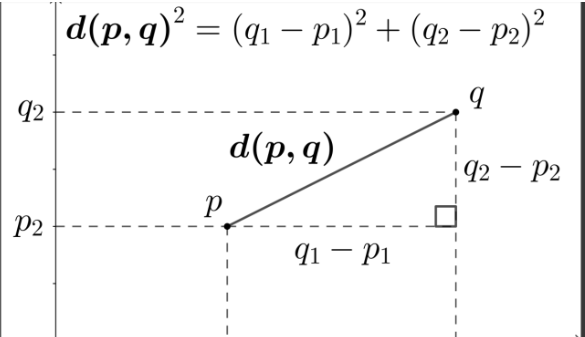

In [79]:
nome_musica = 'Slipknot - Duality'

In [80]:
cluster = projetion_kmeans.filter(projetion_kmeans.artists_song == nome_musica).select('cluster_pca').collect()[0][0]
cluster

5

In [81]:
musicas_recomendadas = projetion_kmeans.filter(projetion_kmeans.cluster_pca == cluster)\
                                       .select('artists_song', 'id', 'pca_features')
musicas_recomendadas.show()

+--------------------+--------------------+--------------------+
|        artists_song|                  id|        pca_features|
+--------------------+--------------------+--------------------+
|Deftones - Change...|51c94ac31swyDQj9B...|[-34.822854780680...|
|3 Doors Down - Loser|1aC1IBAETh2XYGOE8...|[-35.264094584379...|
|Puddle Of Mudd - ...|6lSr3iZTC144PKhvb...|[-35.623641462833...|
|The White Stripes...|21Qsj3cMVCx2xF2EV...|[-35.186505615882...|
|Dave Matthews Ban...|65KzDXZm9aQt8sA1k...|[-34.507219794306...|
|Seether - Fine Again|4eTIe5eqds88bA9ua...|[-35.626919557748...|
|Audioslave - I Am...|3bwAS8cN7Xtzvv5Uu...|[-34.453302556261...|
|Foo Fighters - Ti...|67vYdAAM3oGsEImCR...|[-35.412737177023...|
|Matchbox Twenty -...|6Bm6qUCSatPAqkQll...|[-34.862352519462...|
|Nirvana - You Kno...|5O8L4I2S4izFGDjvP...|[-34.691026535097...|
|Yeah Yeah Yeahs -...|0hDQV9X1Da5JrwhK8...|[-34.765436059943...|
|Alicia Keys - You...|6LGwYMXXgURfaequX...|[-33.496987929460...|
|  Slipknot - Duality|61m

In [89]:
componenetes_musica = musicas_recomendadas.filter(musicas_recomendadas.artists_song == nome_musica)\
                                          .select('pca_features').collect()[0][0]
componenetes_musica                             

DenseVector([-35.769, -165.5902, -9.9085, -139.165, 13.7743, -5.4077])

## Aula 5.2 Recomendação da música

In [83]:
from scipy.spatial.distance import euclidean
from pyspark.sql.types import FloatType

In [84]:
def calcula_distance(value):
  return euclidean(componenetes_musica, value)

udf_calcula_distance = f.udf(calcula_distance, FloatType())

musicas_recomendadas_dist = musicas_recomendadas.withColumn('Dist', udf_calcula_distance('pca_features'))

recomendadas = sessao_spark.createDataFrame(musicas_recomendadas_dist.sort('Dist').take(10)).select(['artists_song', 'id', 'Dist'])

recomendadas.show()

+--------------------+--------------------+------------------+
|        artists_song|                  id|              Dist|
+--------------------+--------------------+------------------+
|  Slipknot - Duality|61mWefnWQOLf90gep...|               0.0|
|Bring Me The Hori...|1PInWkBARsxLyouDq...| 0.596220076084137|
|Bullet For My Val...|1KCAEG6JcsTzi8ddZ...|0.6583670973777771|
|Breaking Benjamin...|10ASBwZsp7oUUDsJE...|0.6854559779167175|
|Bring Me The Hori...|5wHCaqKWrcMkyY7wF...|0.7357434034347534|
|Rise Against - Sa...|3asFGFY3uLjMDmML1...|0.8630947470664978|
|Foo Fighters - Ti...|67vYdAAM3oGsEImCR...|0.8888120055198669|
|Foo Fighters - Br...|0bHD1nLe7Nhw55ZGJ...|0.9269726872444153|
|    Trivium - Strife|15zUfY9L1p7bN9Jsg...|0.9413876533508301|
|Pendulum - Waterc...|5ami95W9OOWQPwrBb...|0.9450974464416504|
+--------------------+--------------------+------------------+



In [85]:
def recomendador(nome_musica):
  cluster = projetion_kmeans.filter(projetion_kmeans.artists_song == nome_musica).select('cluster_pca').collect()[0][0]
  musicas_recomendadas = projetion_kmeans.filter(projetion_kmeans.cluster_pca == cluster)\
                                       .select('artists_song', 'id', 'pca_features')
  componenetes_musica = musicas_recomendadas.filter(musicas_recomendadas.artists_song == nome_musica)\
                                          .select('pca_features').collect()[0][0]

  def calcula_distance(value):
    return euclidean(componenetes_musica, value)

  udf_calcula_distance = f.udf(calcula_distance, FloatType())

  musicas_recomendadas_dist = musicas_recomendadas.withColumn('Dist', udf_calcula_distance('pca_features'))

  recomendadas = sessao_spark.createDataFrame(musicas_recomendadas_dist.sort('Dist').take(10)).select(['artists_song', 'id', 'Dist'])

  recomendadas.select('artists_song').show(truncate=False)


In [86]:
recomendador('Slipknot - Duality')

+-----------------------------------------------------------+
|artists_song                                               |
+-----------------------------------------------------------+
|Slipknot - Duality                                         |
|Bring Me The Horizon - Can You Feel My Heart               |
|Bullet For My Valentine - You Want a Battle? (Here's a War)|
|Breaking Benjamin - Dance With The Devil                   |
|Bring Me The Horizon - Seen It All Before                  |
|Rise Against - Savior                                      |
|Foo Fighters - Times Like These                            |
|Foo Fighters - Bridge Burning                              |
|Trivium - Strife                                           |
|Pendulum - Watercolour - Full Version; Single              |
+-----------------------------------------------------------+



## 5.3 Biblioteca Spotipy

In [87]:
#!pip install spotipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.8/251.8 kB 5.2 MB/s eta 0:00:00a 0:00:01


In [88]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth, SpotifyClientCredentials

In [90]:
scope = "user-library-read playlist-modify-private"

OAuth = SpotifyOAuth(
        scope=scope,         
        redirect_uri='http://localhost:5000/callback',
        client_id = '***************',
        client_secret = '***************')

In [91]:
client_credentials_manager = SpotifyClientCredentials(client_id = '***************',
                                                      client_secret = '***************')

sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [92]:
id = projetion_kmeans.filter(projetion_kmeans.artists_song == nome_musica).select('id').collect()[0][0]
id

'61mWefnWQOLf90gepjOCb3'

In [93]:
sp.track(id)

{'album': {'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/05fG473iIaoy82BF1aGhL8'},
    'href': 'https://api.spotify.com/v1/artists/05fG473iIaoy82BF1aGhL8',
    'id': '05fG473iIaoy82BF1aGhL8',
    'name': 'Slipknot',
    'type': 'artist',
    'uri': 'spotify:artist:05fG473iIaoy82BF1aGhL8'}],
  'available_markets': ['AR',
   'AU',
   'AT',
   'BE',
   'BO',
   'BR',
   'BG',
   'CA',
   'CL',
   'CO',
   'CR',
   'CY',
   'CZ',
   'DK',
   'DO',
   'DE',
   'EC',
   'EE',
   'SV',
   'FI',
   'FR',
   'GR',
   'GT',
   'HN',
   'HK',
   'HU',
   'IS',
   'IE',
   'IT',
   'LV',
   'LT',
   'LU',
   'MY',
   'MT',
   'MX',
   'NL',
   'NZ',
   'NI',
   'NO',
   'PA',
   'PY',
   'PE',
   'PH',
   'PL',
   'PT',
   'SG',
   'SK',
   'ES',
   'SE',
   'CH',
   'TW',
   'TR',
   'UY',
   'US',
   'GB',
   'AD',
   'LI',
   'MC',
   'ID',
   'JP',
   'TH',
   'VN',
   'RO',
   'IL',
   'ZA',
   'SA',
   'AE',
   'BH',
   'QA',
   'OM',
   

In [94]:
def recomendador(nome_musica):
  # Calcula musicas recomendadas
  cluster = projetion_kmeans.filter(projetion_kmeans.artists_song == nome_musica).select('cluster_pca').collect()[0][0]
  musicas_recomendadas = projetion_kmeans.filter(projetion_kmeans.cluster_pca == cluster)\
                                       .select('artists_song', 'id', 'pca_features')
  componenetes_musica = musicas_recomendadas.filter(musicas_recomendadas.artists_song == nome_musica)\
                                          .select('pca_features').collect()[0][0]

  def calcula_distance(value):
    return euclidean(componenetes_musica, value)

  udf_calcula_distance = f.udf(calcula_distance, FloatType())

  musicas_recomendadas_dist = musicas_recomendadas.withColumn('Dist', udf_calcula_distance('pca_features'))

  recomendadas = sessao_spark.createDataFrame(musicas_recomendadas_dist.sort('Dist').take(10)).select(['artists_song', 'id', 'Dist'])

  recomendadas.select('artists_song').show(truncate=False)

  #Pegar informações da API

  playlist_id = recomendadas.select('id').collect()

  playlist_track = []

  for id in playlist_id:
    playlist_track.append(sp.track(id[0]))

  return len(playlist_track)

In [95]:
recomendador('Slipknot - Duality')

+-----------------------------------------------------------+
|artists_song                                               |
+-----------------------------------------------------------+
|Slipknot - Duality                                         |
|Bring Me The Horizon - Can You Feel My Heart               |
|Bullet For My Valentine - You Want a Battle? (Here's a War)|
|Breaking Benjamin - Dance With The Devil                   |
|Bring Me The Horizon - Seen It All Before                  |
|Rise Against - Savior                                      |
|Foo Fighters - Times Like These                            |
|Foo Fighters - Bridge Burning                              |
|Trivium - Strife                                           |
|Pendulum - Watercolour - Full Version; Single              |
+-----------------------------------------------------------+



10

https://developer.spotify.com/documentation/web-api/reference/#/operations/get-track

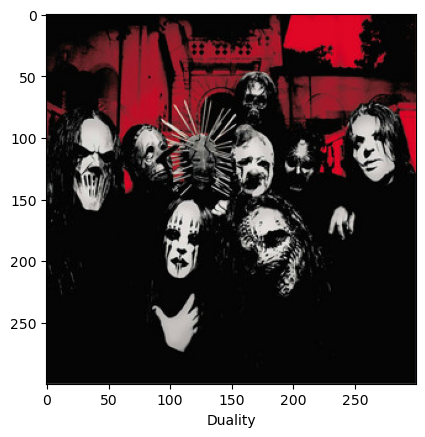

In [96]:
import matplotlib.pyplot as plt
from skimage import io

nome_musica = 'Slipknot - Duality'

id = projetion_kmeans\
          .filter(projetion_kmeans.artists_song == nome_musica)\
          .select('id').collect()[0][0]

track = sp.track(id)

url = track["album"]["images"][1]["url"]
name = track["name"]

image = io.imread(url)
plt.imshow(image)
plt.xlabel(name, fontsize = 10)
plt.show()

In [97]:
import matplotlib.pyplot as plt
from skimage import io

def visualize_songs(name,url):

    plt.figure(figsize=(15,10))
    columns = 5
    for i, u in enumerate(url):
        ax = plt.subplot(len(url) // columns + 1, columns, i + 1)
        image = io.imread(u)
        plt.imshow(image)
        ax.get_yaxis().set_visible(False)
        plt.xticks(color = 'w', fontsize = 0.1)
        plt.yticks(color = 'w', fontsize = 0.1)
        plt.xlabel(name[i], fontsize = 10)
        plt.tight_layout(h_pad=0.7, w_pad=0)
        plt.subplots_adjust(wspace=None, hspace=None)
        plt.grid(visible=None)
        #plt.axis('off')
    plt.show()

In [99]:
playlist_id = recomendadas.select('id').collect()

name = []
url = []
for i in playlist_id:
    track = sp.track(i[0])
    url.append(track["album"]["images"][1]["url"])
    name.append(track["name"])

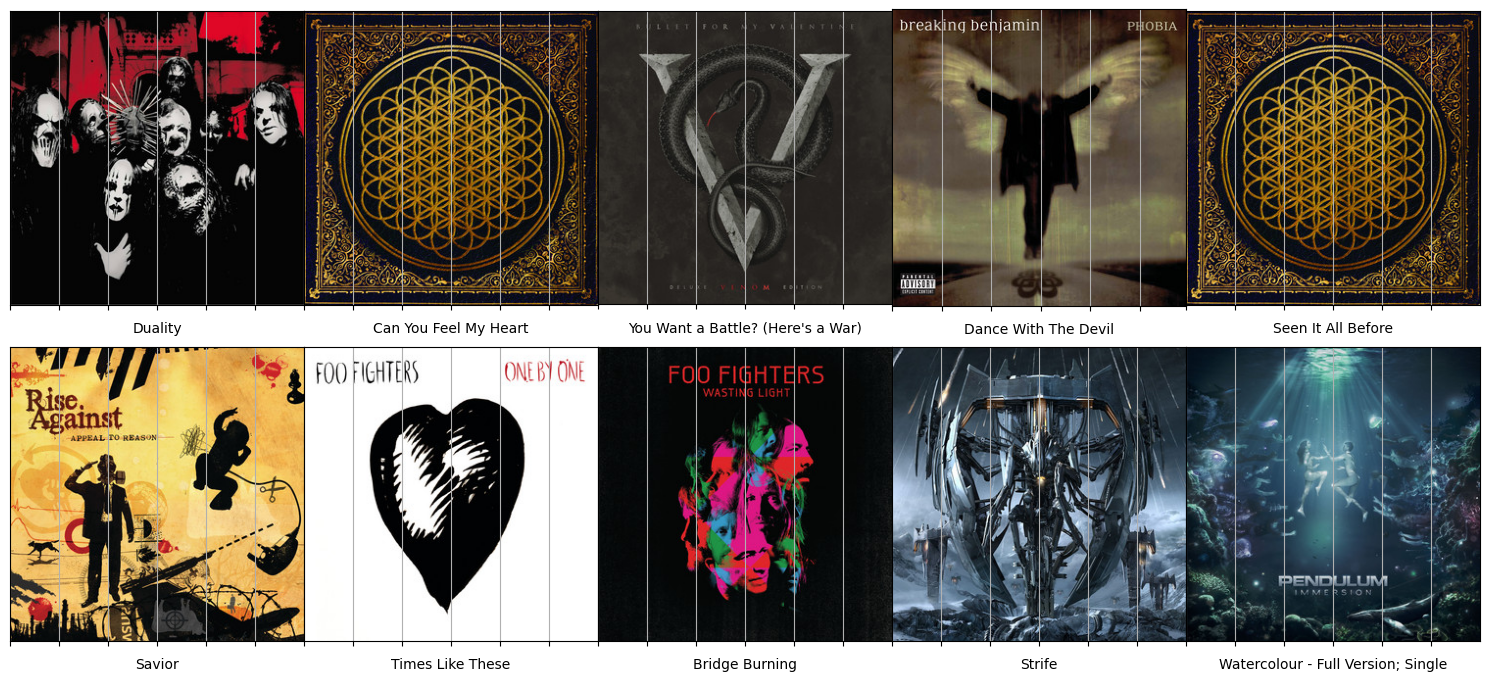

In [100]:
visualize_songs(name,url)

In [101]:
def recomendador(nome_musica):
  # Calcula musicas recomendadas
  cluster = projetion_kmeans.filter(projetion_kmeans.artists_song == nome_musica).select('cluster_pca').collect()[0][0]
  musicas_recomendadas = projetion_kmeans.filter(projetion_kmeans.cluster_pca == cluster)\
                                       .select('artists_song', 'id', 'pca_features')
  componenetes_musica = musicas_recomendadas.filter(musicas_recomendadas.artists_song == nome_musica)\
                                          .select('pca_features').collect()[0][0]

  def calcula_distance(value):
    return euclidean(componenetes_musica, value)

  udf_calcula_distance = f.udf(calcula_distance, FloatType())

  musicas_recomendadas_dist = musicas_recomendadas.withColumn('Dist', udf_calcula_distance('pca_features'))

  recomendadas = sessao_spark.createDataFrame(musicas_recomendadas_dist.sort('Dist').take(10)).select(['artists_song', 'id', 'Dist'])

  #Pegar informações da API

  playlist_id = recomendadas.select('id').collect()

  name = []
  url = []
  for i in playlist_id:
      track = sp.track(i[0])
      url.append(track["album"]["images"][1]["url"])
      name.append(track["name"])

  #Plotando capas 

  plt.figure(figsize=(15,10))
  columns = 5
  for i, u in enumerate(url):
      ax = plt.subplot(len(url) // columns + 1, columns, i + 1)
      image = io.imread(u)
      plt.imshow(image)
      ax.get_yaxis().set_visible(False)
      plt.xticks(color = 'w', fontsize = 0.1)
      plt.yticks(color = 'w', fontsize = 0.1)
      plt.xlabel(name[i], fontsize = 10)
      plt.tight_layout(h_pad=0.7, w_pad=0)
      plt.subplots_adjust(wspace=None, hspace=None)
      plt.grid(visible=None)
      #plt.axis('off')
  plt.show()

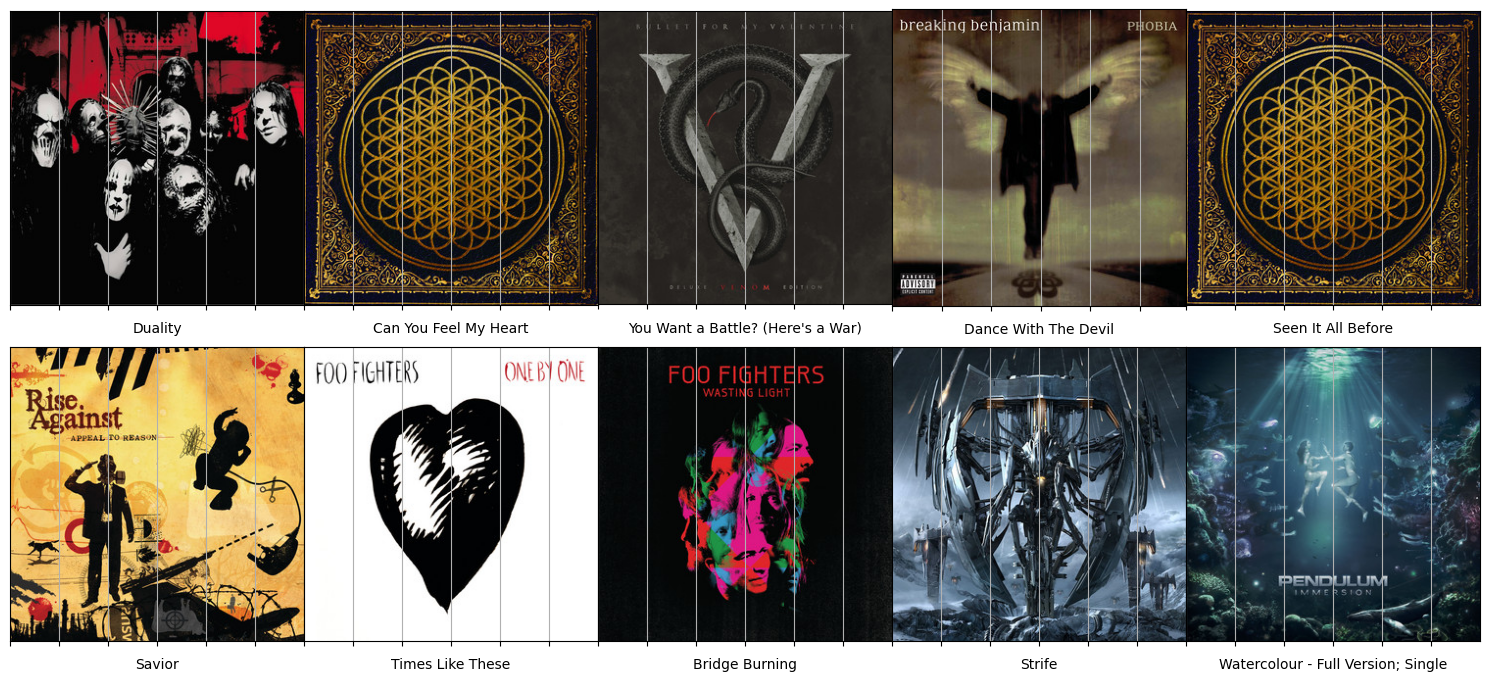

In [102]:
recomendador('Slipknot - Duality')